<a href="https://colab.research.google.com/github/shameer-phy/Pandas_EDA/blob/main/Project_Geo_spatial_Analysis/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We will process the data to make it ready for usage in the model

In [2]:
#Read the Dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Datasets/GlobalLandTemperaturesByCity.csv')

In [7]:
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [9]:
usa = df[df['Country']=='United States']


In [16]:
usa['City'].unique()
usa.shape

(687289, 7)

In [17]:
req_cities = ['New York','Los Angeles','San Francisco']
usa_data = usa[usa['City'].isin(req_cities)]

In [21]:
usa_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [22]:
usa_data = usa_data[['dt','AverageTemperature']]

In [24]:
usa_data.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [28]:
usa_data.dtypes
usa_data['dt']=pd.to_datetime(usa_data['dt'])

In [30]:
usa_data.dtypes
usa_data.columns = ['Date', 'Temp']

In [32]:
usa_data.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [33]:
usa_data.isnull().sum()

Date      0
Temp    120
dtype: int64

In [34]:
usa_data.dropna(inplace=True)

In [36]:
usa_data.isnull().sum()

Date    0
Temp    0
dtype: int64

#For Time Series analysis it is required that row indexes are datetime objects

In [39]:
usa_data.set_index('Date',inplace=True)
usa_data.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


#Check if data is stationery or not. If not, make it stationery.
Stationery means average and std should not change with time.

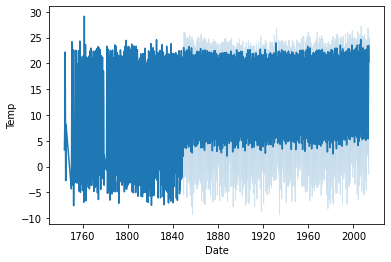

In [41]:
import seaborn as sns
sns.lineplot(x=usa_data.index,y=usa_data['Temp'])

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
test_result = adfuller(usa_data['Temp'])
test_result

(-2.0063893036757956,
 0.28377865833332594,
 35,
 7037,
 {'1%': -3.431279613044704,
  '10%': -2.5669886726127307,
  '5%': -2.8619508146206374},
 28011.222669408726)

In [49]:
def adfuller_test(Temp):
  result = adfuller(Temp)
  labels = ['ADF Test Statistic','P-value','#lags used', 'Number of observations used']
  for value, label in zip(result,labels):
    print(label + ':' + str(value))
  if result[1] < 0.05:
    print('Reject null hypothesis. Data is stationary')
  else:
    print('Failed to reject null hypothesis. Data is not stationery')

In [51]:
adfuller_test(usa_data['Temp'])

ADF Test Statistic:-2.0063893036757956
P-value:0.28377865833332594
#lags used:35
Number of observations used:7037
Failed to reject null hypothesis. Data is not stationery


In [56]:
usa_copy = usa_data.copy()
usa_copy

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834
...,...
2013-05-01,17.434
2013-06-01,19.759
2013-07-01,20.657


In [58]:
usa_copy['first temp diff']=usa_copy['Temp'] - usa_copy['Temp'].shift(12)

In [60]:
usa_copy

,Temp,first temp diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
...,...,...
2013-05-01,17.434,0.879
2013-06-01,19.759,1.277
2013-07-01,20.657,1.025


In [63]:
adfuller_test(usa_copy['first temp diff'].dropna())

ADF Test Statistic:-21.23965040491091
P-value:0.0
#lags used:35
Number of observations used:7025
Reject null hypothesis. Data is stationary


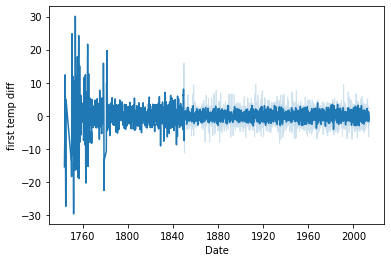

In [68]:
sns.lineplot(x=usa_copy.index,y=usa_copy['first temp diff'],sizes=(15,15))

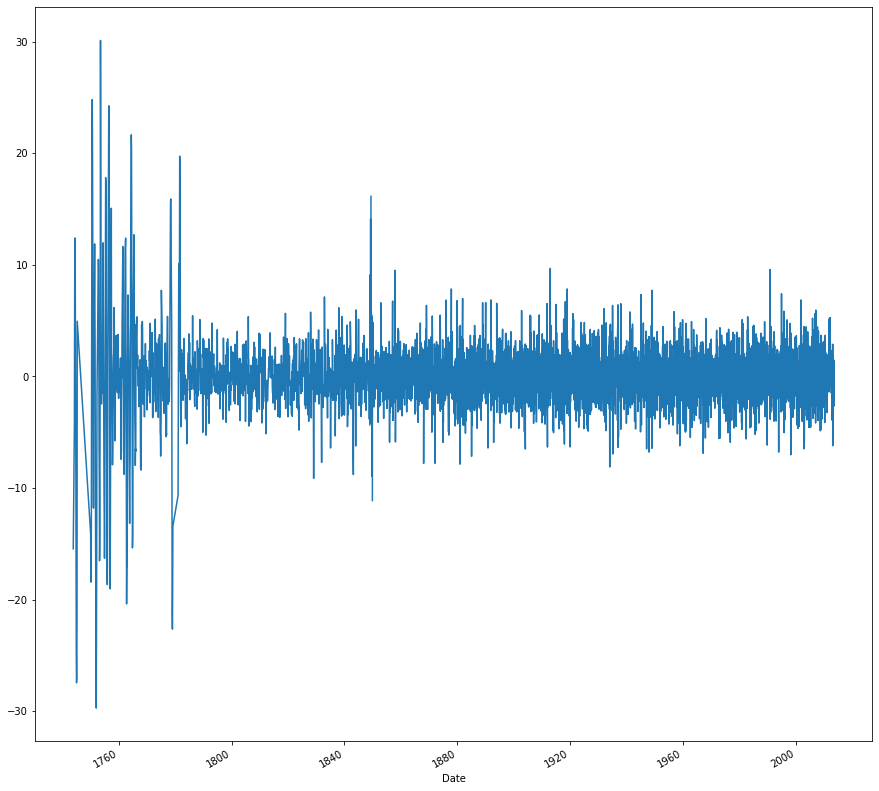

In [67]:
usa_copy['first temp diff'].plot(figsize=(15,15))